In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
print(mnist)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4428cd1be0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4428cd1f28>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4428cd1668>)


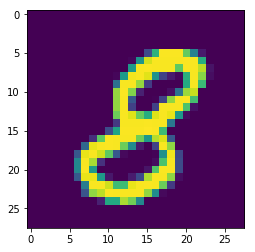

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [14]:
import matplotlib.pyplot as plt

img = mnist.train.images[5].reshape(28,28)
plt.imshow(img)
plt.show()

# print(img)

batch_xs, batch_ys = mnist.train.next_batch(10)
print(batch_ys)

In [24]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy = tf.losses.mean_squared_error(y, y_)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.8909


[   8   33   38 ..., 9985 9986 9998]


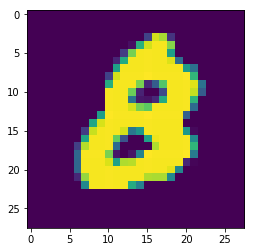

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
correct:  8
[  2.39896476e-01   8.30338613e-05   2.06206813e-01   7.88911656e-02
   7.89353903e-03   6.93130568e-02   2.35678077e-01   1.22774218e-03
   1.12952232e-01   4.78578731e-02]
wrong:  0


In [61]:
import numpy as np

acc = sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
ind, = np.where(acc == False)

print(ind)

failedImgs = mnist.test.images[ind]
testi = 55
theFaildeImg = failedImgs[testi]
plt.imshow(theFaildeImg.reshape(28,28))
plt.show()
print(mnist.test.labels[ind[testi]])
correct = np.argmax(mnist.test.labels[ind[testi]])
print('correct: ',correct)

wrong = y.eval({x: mnist.test.images, y_: mnist.test.labels}, sess)[ind][testi]
print(wrong)
print('wrong: ', np.argmax(wrong))

In [31]:
a = np.random.rand(3,3, 3)
a[2][:]

array([[ 0.40627036,  0.91059231,  0.32408481],
       [ 0.23119308,  0.74942226,  0.95689065],
       [ 0.16994671,  0.08174588,  0.92780549]])